In [ ]:
import gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
env = gym.make("LunarLander-v2")

<h1>Train with two states from observation space<h1>

In [ ]:
epi = 5000

In [ ]:
#train with only two states
#very limited
#Q-Table given below
#state1: angle > 0
#state2: angle < 0
#action1: do nothing
#action2: fire left engine
#action3: fire main engine
#action4: fire right engine
#       action1 action2 action3 action4
#state1[a       b       c       d      ]
#state2[e       f       g       h      ]
Q = np.empty((2,env.action_space.n))
action = env.action_space.sample()
score = 0
epi_list=np.zeros(epi)
s_list=np.zeros(epi)
for i in range(epi):
    state, info = env.reset(seed=0)
    state = 0 if state[4] > 0 else 1
    while True:
        if np.random.uniform() < 0.05:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        next_state, reward, terminated, truncated, info = env.step(action)
        next_state = int(np.abs(next_state[0]))
        Q[state][action] = Q[state][action] + 0.9 * (reward + 0.1 * np.max(Q[next_state]) - Q[state][action])
        state = next_state
        score += reward
        if terminated or truncated:
            print(f"Episode: {i} score: {score}")
            epi_list[i] = i
            s_list[i] = score
            score = 0
            break
env.close()

Episode: 0 score: -139.72918740682564
Episode: 1 score: -94.10981753905155
Episode: 2 score: -126.68939611880268
Episode: 3 score: -129.77779300888193
Episode: 4 score: -70.19651872805925
Episode: 5 score: -126.41883132304761
Episode: 6 score: -127.74118992403616
Episode: 7 score: -325.06097821509417
Episode: 8 score: -434.71798007659294
Episode: 9 score: -64.90556761252792
Episode: 10 score: -293.2957855554705
Episode: 11 score: -375.1028897777922
Episode: 12 score: -426.9675991952753
Episode: 13 score: -395.4564454990324
Episode: 14 score: -413.8002971932232
Episode: 15 score: -244.55371046346878
Episode: 16 score: -163.58212402149562
Episode: 17 score: -300.5685560283033
Episode: 18 score: -109.41808840233674
Episode: 19 score: -193.054494824223
Episode: 20 score: -114.74557394121962
Episode: 21 score: -115.82511134418752
Episode: 22 score: -113.91140335182538
Episode: 23 score: -192.97395707059397
Episode: 24 score: -379.9847717288439
Episode: 25 score: -119.05959591305864
Episode:

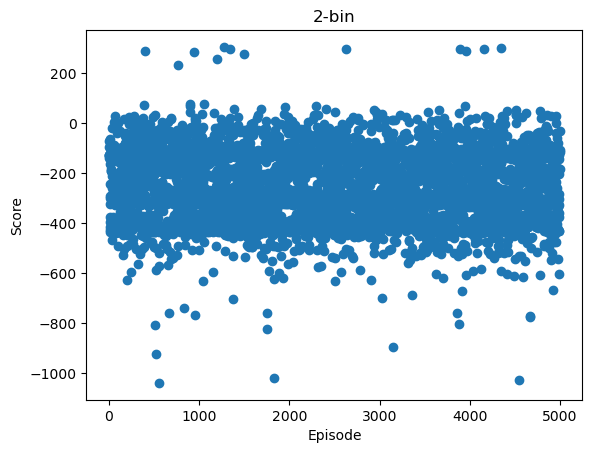

In [ ]:
plt.title("2-bin")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.scatter(epi_list,s_list)
plt.show()

<h1>Train with discretized observation space<h1>

In [ ]:
def obs_to_state(env, obs):
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_dx = (env_high - env_low) / 8
    a = int(max(0, min(7, (obs[0] - env_low[0]) / env_dx[0])))
    b = int(max(0, min(7, (obs[1] - env_low[1]) / env_dx[1])))
    c = int(max(0, min(7, (obs[2] - env_low[2]) / env_dx[2])))
    d = int(max(0, min(7, (obs[3] - env_low[3]) / env_dx[3])))
    e = int(max(0, min(7, (obs[4] - env_low[4]) / env_dx[4])))
    f = int(max(0, min(7, (obs[5] - env_low[5]) / env_dx[5])))
    h = 0 if int(np.abs(obs[6] - env_low[6])/env_dx[6]) < 4 else 1
    g = 0 if int(np.abs(obs[7] - env_low[7])/env_dx[7]) < 4 else 1
    state = (a,b,c,d,e,f,g,h)
    return state

In [ ]:
episodes = 5000
epsilon = 0.05

In [ ]:
Q = np.zeros((8,8,8,8,8,8,2,2,4))
action = env.action_space.sample()
score = 0
episode_list=np.zeros(episodes)
score_list=np.zeros(episodes)
for i in range(episodes):
    observation, info = env.reset(seed=0)
    state = obs_to_state(env,observation)
    eta = max(0.001, 1 * (0.85 ** (i//100)))    #update learning rate
    while True:
        if np.random.uniform(0,1) < epsilon:  #epsilon-greedy policy
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        next_observation, reward, terminated, truncated, info = env.step(action)
        next_state = obs_to_state(env,next_observation)
        Q[state][action] = Q[state][action] + eta * (reward + 1 * np.max(Q[next_state]) - Q[state][action])
        state = next_state
        score += reward
        if terminated or truncated:
            print(f"Episode: {i} score: {score}")
            episode_list[i] = i
            score_list[i] = score
            score = 0
            break
env.close()

Episode: 0 score: -207.99333723469582
Episode: 1 score: -7.088433984924208
Episode: 2 score: -354.18405460688473
Episode: 3 score: -212.72642397731244
Episode: 4 score: -46.75077059097759
Episode: 5 score: -251.39848508283447
Episode: 6 score: -201.06659799100174
Episode: 7 score: -185.96125098309446
Episode: 8 score: -198.47310421984218
Episode: 9 score: -66.97823610010384
Episode: 10 score: -50.75460157936146
Episode: 11 score: -298.1660112068123
Episode: 12 score: -74.3220196243936
Episode: 13 score: -93.05434343695421
Episode: 14 score: -193.534768836973
Episode: 15 score: -198.33440984956533
Episode: 16 score: -216.90978613688344
Episode: 17 score: 28.380431227710687
Episode: 18 score: -8.424082950229433
Episode: 19 score: -26.125728868608064
Episode: 20 score: -22.195427281422226
Episode: 21 score: -290.22303360262066
Episode: 22 score: -36.10504492841055
Episode: 23 score: -147.34123004102526
Episode: 24 score: 50.2527708348469
Episode: 25 score: -27.319042211207545
Episode: 26 

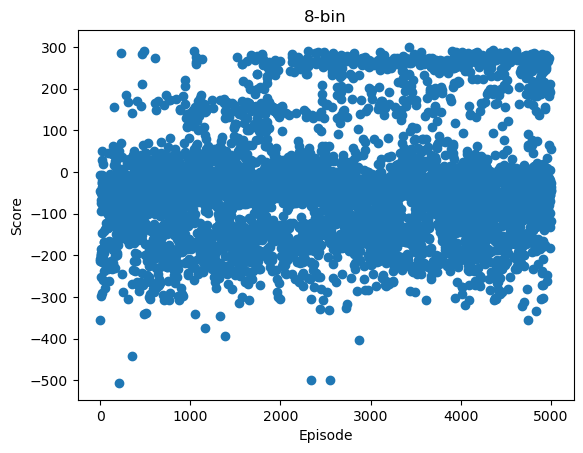

In [ ]:
plt.title("8-bin")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.scatter(episode_list,score_list)
plt.show()